# WeatherPy
----

### Analysis
* We can see from the “Latitude vs. Temperature Plot” that the weather is warmer as we approach the equator. Moreover the southern hemisphere tends to be warmer than the northern hemisphere this time of year.
* There is no strong relationship between latitude and humidity. However most cities tend to be pretty humid (>70%) based on the “Latitude vs. Humidity Plot”.
* There is no strong relationship between latitude and wind speed. However most cities tend to have lower wind speed (<10 mph) based on the “Latitude vs. Wind Speed Plot”. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_data = []

print("Beginning Data Retrieval")
print("-----------------------------")

record = 1
set = 1

for i, city in enumerate(cities, 1):
    if i % 50 == 0:
        set += 1
        record = 0
    print("Processing Record %s of Set %s | %s" % (record, set, city))
    
    query_url = f"{url}&q=" + city
    print(query_url)
          
    record += 1

    try:
        response = requests.get(query_url).json()

        city_cloudiness = response["clouds"]["all"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        city_humidity = response["main"]["humidity"]
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_wind_speed = response["wind"]["speed"]

        city_data.append({"City": city,
                          "Cloudiness": city_cloudiness,
                          "Country": city_country,
                          "Date": city_date,
                          "Humidity": city_humidity,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind_speed})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | gweta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=gweta
Processing Record 2 of Set 1 | noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=noumea
Processing Record 3 of Set 1 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cabo san lucas
Processing Record 4 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta arenas
Processing Record 5 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=albany
Processing Record 6 of Set 1 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=castro
Processing Record 7 of Set 1 | 

Processing Record 4 of Set 2 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=katsuura
Processing Record 5 of Set 2 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=yumen
Processing Record 6 of Set 2 | boskovice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=boskovice
Processing Record 7 of Set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tuktoyaktuk
Processing Record 8 of Set 2 | urumqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=urumqi
City not found. Skipping...
Processing Record 9 of Set 2 | tuggurt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tuggurt
City not found. Skipping...
Processing Record 10 of Set 2 | port

Processing Record 6 of Set 3 | alexandria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=alexandria
Processing Record 7 of Set 3 | salta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=salta
Processing Record 8 of Set 3 | talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=talcahuano
Processing Record 9 of Set 3 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=victoria
Processing Record 10 of Set 3 | utrecht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=utrecht
Processing Record 11 of Set 3 | blagoyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=blagoyevo
Processing Record 12 of Set 3 | nouadhibou
http://api.openweathermap.org/data/2.5/we

Processing Record 9 of Set 4 | fukue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=fukue
Processing Record 10 of Set 4 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiksi
Processing Record 11 of Set 4 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=alofi
Processing Record 12 of Set 4 | kochinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kochinda
Processing Record 13 of Set 4 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=salalah
Processing Record 14 of Set 4 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=komsomolskiy
Processing Record 15 of Set 4 | souillac
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 12 of Set 5 | mayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mayo
Processing Record 13 of Set 5 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=amderma
City not found. Skipping...
Processing Record 14 of Set 5 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=faya
Processing Record 15 of Set 5 | portoferraio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=portoferraio
Processing Record 16 of Set 5 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=padang
Processing Record 17 of Set 5 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=chokurdakh
Processing Record 18 of Set 5 | chagda
http://api.openweathermap

Processing Record 16 of Set 6 | naryan-mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=naryan-mar
Processing Record 17 of Set 6 | boli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=boli
Processing Record 18 of Set 6 | karauzyak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=karauzyak
City not found. Skipping...
Processing Record 19 of Set 6 | banda aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=banda aceh
Processing Record 20 of Set 6 | parana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=parana
Processing Record 21 of Set 6 | fereydun kenar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=fereydun kenar
Processing Record 22 of Set 6 | abu jubayhah

Processing Record 18 of Set 7 | panjab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=panjab
Processing Record 19 of Set 7 | azimur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=azimur
City not found. Skipping...
Processing Record 20 of Set 7 | tateyama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tateyama
Processing Record 21 of Set 7 | lushunkou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lushunkou
City not found. Skipping...
Processing Record 22 of Set 7 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=san policarpo
Processing Record 23 of Set 7 | kyzyl-suu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kyzyl-suu
Processing Record 24

Processing Record 20 of Set 8 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ambon
Processing Record 21 of Set 8 | honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=honiara
Processing Record 22 of Set 8 | gurskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=gurskoye
City not found. Skipping...
Processing Record 23 of Set 8 | innisfail
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=innisfail
Processing Record 24 of Set 8 | hudson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hudson bay
Processing Record 25 of Set 8 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kununurra
Processing Record 26 of Set 8 | teya
http://api.openwe

Processing Record 23 of Set 9 | northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=northam
Processing Record 24 of Set 9 | sol-iletsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sol-iletsk
Processing Record 25 of Set 9 | port keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=port keats
Processing Record 26 of Set 9 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=flinders
Processing Record 27 of Set 9 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-augustin
Processing Record 28 of Set 9 | maxixe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=maxixe
Processing Record 29 of Set 9 | broome
http://api.openweathermap.org

Processing Record 27 of Set 10 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=north bend
Processing Record 28 of Set 10 | yashan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=yashan
Processing Record 29 of Set 10 | kindu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kindu
Processing Record 30 of Set 10 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lagoa
Processing Record 31 of Set 10 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=la ronge
Processing Record 32 of Set 10 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bambanglipuro
Processing Record 33 of Set 10 | tabou
http://api.openweathermap.org/data/2.5/

Processing Record 30 of Set 11 | etla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=etla
Processing Record 31 of Set 11 | guajara-mirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=guajara-mirim
City not found. Skipping...
Processing Record 32 of Set 11 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hambantota
Processing Record 33 of Set 11 | susehri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=susehri
Processing Record 34 of Set 11 | kaili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kaili
Processing Record 35 of Set 11 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lasa
Processing Record 36 of Set 11 | kenai
http://api.openweat

Processing Record 33 of Set 12 | okandja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=okandja
City not found. Skipping...
Processing Record 34 of Set 12 | djambala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=djambala
Processing Record 35 of Set 12 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hualmay
Processing Record 36 of Set 12 | la roche-sur-yon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=la roche-sur-yon
Processing Record 37 of Set 12 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=paamiut
Processing Record 38 of Set 12 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=acajutla
Processing Record 39 of Set 12 | grind

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame(city_data)

city_df.to_csv(output_data_file)

city_df.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [5]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,gweta,20,BW,1545781607,52,-20.21,25.26,79.67,13.56
1,noumea,75,NC,1545780600,69,-22.28,166.46,80.60,13.87
2,cabo san lucas,5,MX,1545778080,53,22.89,-109.91,86.00,14.99
3,punta arenas,40,CL,1545778800,62,-53.16,-70.91,53.60,11.41
4,albany,20,US,1545779820,55,42.65,-73.75,28.94,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

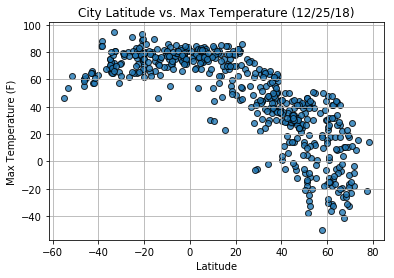

In [6]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", edgecolor="black", alpha=0.8)

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig1.png")

plt.show()

#### Latitude vs. Humidity Plot

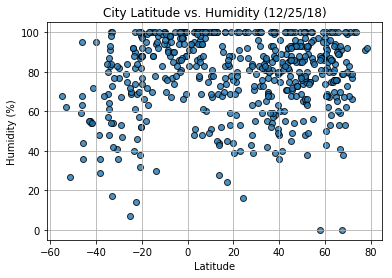

In [7]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", edgecolor="black", alpha=0.8)

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig2.png")

plt.show()

#### Latitude vs. Cloudiness Plot

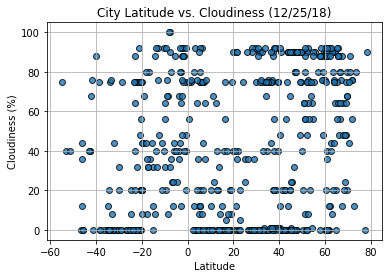

In [8]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", edgecolor="black", alpha=0.8)

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

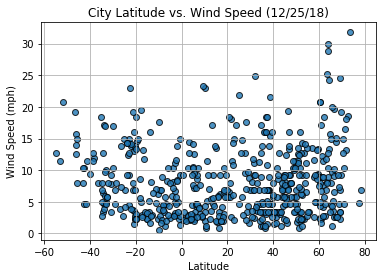

In [9]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o", edgecolor="black", alpha=0.8)

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig4.png")

plt.show()